In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G=nx.Graph()

In [3]:
#read the txt file into the python
linelist,e,no=[],[],[]
with open ("In-class_network.txt","r") as F : 
    for line in F :
        line=line.replace("\t",".").strip("\n").split(".")
        linelist.append(line)
    linelist=linelist[1:]
    for i in range(len(linelist)):
        linelist[i]=linelist[i][0:2]
        linelist[i][0]=int(linelist[i][0])
    for i in range(len(linelist)):
        if linelist[i][1].count(",")>=1:
            num=linelist[i][1].split(",")
            for d in num :
                e+=[(linelist[i][0],int(d))]
        elif linelist[i][1]==" ":
            no+=[linelist[i][0]] #Create the node
        else :
            e+=[(linelist[i][0],int(linelist[i][1]))] #Create the edges

In [4]:
G.add_nodes_from(no) #Let the nodes and edges been written into graph
G.add_edges_from(e)

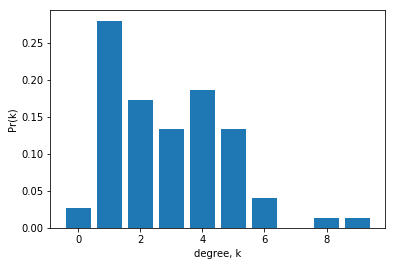

In [5]:
# Draw the plot
vector,degree=[],[]
for i in G.nodes():
    vector+=[i]
    degree+=[len(G.edges(i))]
ki=pd.DataFrame({"vector":vector,"degree":degree}) #Dataframe includs the id and degree
ki=ki.sort_values(by="vector")
x,y=[],[]
ki2=ki["degree"].value_counts().sort_index() #After count the value , sort the dataframe by index
for i in ki2.index:
    x+=[i]
    y+=[ki2[i]/G.order()]
plt.bar(x,y)
plt.xlabel("degree, k")
plt.ylabel("Pr(k)")
plt.show() #Show the degree distribution